In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [114]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [24]:
# electionSwingStates dataset shows: dem_share is % of vote for Obama at each country

df_swing = pd.read_csv('electionSwingStates.csv')
df_swing[['state','county','dem_share']]

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04
...,...,...,...
217,OH,Hamilton County,53.53
218,OH,Highland County,36.54
219,OH,Hocking County,49.58
220,OH,Licking County,41.97


# Basic graphs

## Histogram using matplotlib

In [25]:
import matplotlib.pyplot as plt

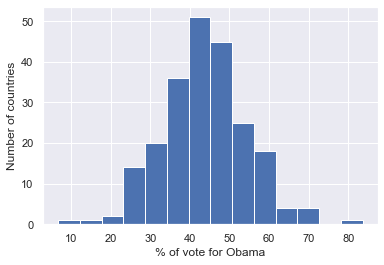

In [26]:
# Assume we want to determine number of bins based on square root of number of data points: dem_share
n_bins = np.sqrt(len(df_swing['dem_share'])) #n_bins: float

_ = plt.hist(df_swing['dem_share'], bins = int(n_bins)) #n_bins is int
_ = plt.xlabel("% of vote for Obama")
_ = plt.ylabel('Number of countries')
plt.show()

## Histogram using Seaborn

Seaborn is an excellent Matplotlib-based statistical data visualization package writen by Michael Waskom

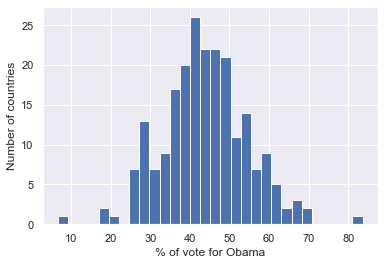

In [27]:
# Setting seaborn styling
import seaborn as sns
sns.set()
_ = plt.hist(df_swing['dem_share'], bins = 30)
_ = plt.xlabel("% of vote for Obama")
_ = plt.ylabel('Number of countries')
plt.show()

## Bee swarm plot

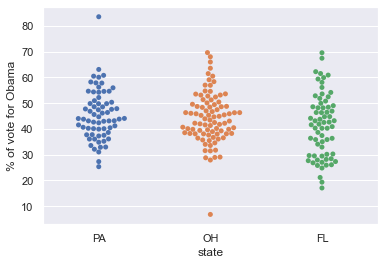

In [17]:
_ = sns.swarmplot(x = 'state', y = 'dem_share', data = df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('% of vote for Obama')
plt.show()

## Empirical cumulative distribution function (ECDF)

We displayed bee swarm on 3 different state with datapoints (are counties), and it seems quite appropriate when we look at graph because data points are not too few or too much

Assume that we group into 2 regions: East and West, then datapoints will have much and might overlap

=> We can use ECDF to show: X% of counties have Y% or less vote for Obama

Example: arrange score in increasing order. X is score, and Y is % cumulative

Score |                              % cumulative

2     |   (position of score 2) / (total positions) = 1/4: 25% people have score <= 2 

5     |  (position of score 5) / (total positions) = 2/4: 50% people have score <= 5 

8     |   (position of score 8) / (total positions) = 3/4: 75% people have score <= 8 

10    |  (position of score 10) / (total positions) = 4/4: 100% people have score <= 10

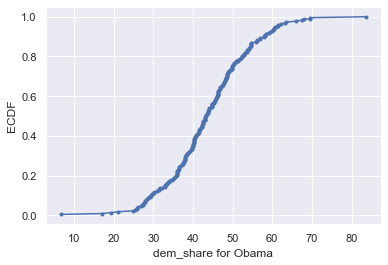

In [82]:
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1) / len(x) #At each position of x, divide by total datapoints

_ = plt.plot(x,y, marker = '.')
_ = plt.xlabel('dem_share for Obama')
_ = plt.ylabel('ECDF')

In [38]:
# Write functions for ECDF

def ECDF(data, col):
    x = np.sort(data[col])
    y = np.arange(1, len(x) + 1) / len(x)
    
    return x, y

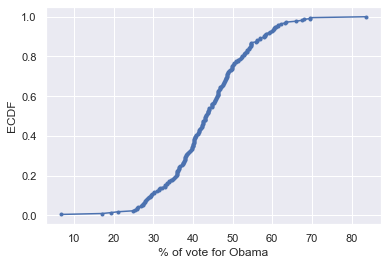

In [39]:
# Call function ECDF
ECDF(df_swing,'dem_share')    
    
_ = plt.plot(x, y, marker = '.')

_ = plt.xlabel('')
_ = plt.xlabel('% of vote for Obama')
_ = plt.ylabel('ECDF')

In [71]:
# Example 2
sales = pd.read_csv('sales_subset.csv')

In [74]:
sales.head()

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [77]:
sales_A = sales[(sales['type'] == 'A')]
sales_B = sales[(sales['type'] == 'B')]

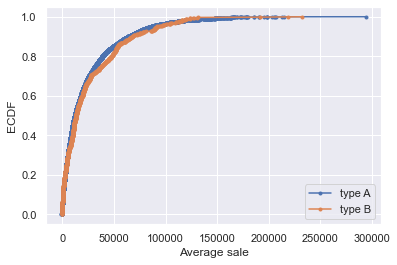

In [78]:
# Call function ECDF
x_A, y_A = ECDF(sales_A,'weekly_sales')  
x_B, y_B = ECDF(sales_B,'weekly_sales')    

# Plot all ECDFs on the same plot
_ = plt.plot(x_A, y_A, marker = '.')
_ = plt.plot(x_B, y_B, marker = '.')

# Annotate the plot
_ = plt.legend(('type A', 'type B'), loc = 'lower right')
_ = plt.xlabel('Average sale')
_ = plt.ylabel('ECDF')

plt.show()

## Percentiles

In [81]:
# Specify array of percentiles: percentiles

percentiles = np.array([25, 50, 75, 97.5])
ptiles_vers = np.percentile(df_swing['dem_share'], percentiles)
print(ptiles_vers)

# There are 25% of states have dem_share < 37.3025; 50% of states have dem_share < 43.185
# If we compare these numbers with ECDF, they are the same

[37.3025 43.185  49.925  64.7195]


## Compare ECDF and Percentiles

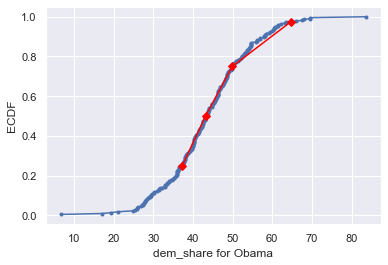

In [84]:
# Plot ECDF

x_state, y_state = ECDF(df_swing,'dem_share')
_ = plt.plot(x_state, y_state, marker = '.')
_ = plt.xlabel('dem_share for Obama')
_ = plt.ylabel('ECDF')

# Plot Percentiles
_ = plt.plot(ptiles_vers, percentiles/100, marker = 'D', color = 'red')

plt.show()

## Box-and-whisker plot

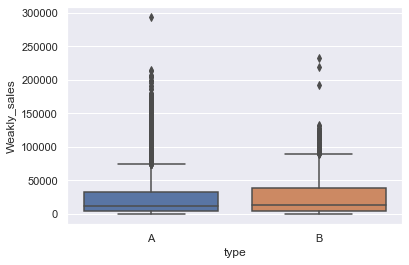

In [88]:
# Use Seaborn's default settings

_ = sns.boxplot(x = 'type', y = 'weekly_sales', data = sales)
_ = plt.xlabel('type')
_ = plt.ylabel('Weakly_sales')

plt.show()

## Compute basic statistics using numpy

In [91]:
variance = np.var(sales['weekly_sales'])
np.sqrt(variance)

30218.985056027053

In [92]:
np.std(sales['weekly_sales'])

30218.985056027053

In [93]:
np.mean(sales['weekly_sales'])

23843.950148505668

In [94]:
np.median(sales['weekly_sales'])

12049.064999999999

In [109]:
# Covariance matrix

covariance_matrix = np.cov(df_swing['dem_votes'],df_swing['rep_votes'])
print(covariance_matrix)
#covariance_matrix[0,0] : dem_votes vs dem_votes
#covariance_matrix[1,1] : rep_votes vs rep_votes
#covariance_matrix[0,1] = covariance_matrix[1,0]: dem_votes vs rep_votes

[[7.90553527e+09 4.44251518e+09]
 [4.44251518e+09 3.15943622e+09]]


In [115]:
# Pearson correlation coefficent r: often easier to interpret than covariance

np.corrcoef(df_swing['dem_votes'],df_swing['rep_votes'])

# Wrap into function
def pearson(value1, value2):
    r = np.corrcoef(value1, value2)
    return r[0,1]

print(pearson(df_swing['dem_votes'],df_swing['rep_votes']))

array([[1.        , 0.88891142],
       [0.88891142, 1.        ]])

0.8889114162385436


## Scatter plot

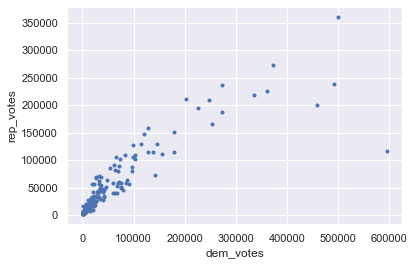

In [108]:
_ = plt.plot(df_swing['dem_votes'],df_swing['rep_votes'], marker = '.', linestyle = 'none')
_ = plt.xlabel('dem_votes')
_ = plt.ylabel('rep_votes')

plt.show()

# Statistical inference

Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions.

## Generate random numbers thousands of times

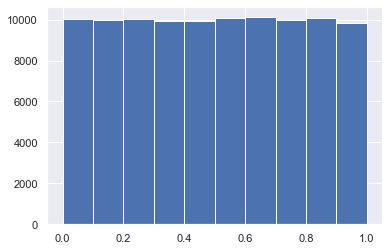

In [119]:
# Use np.random module
# np.random.random() function: return a random number between 0 and 1

# Repeat the experiments thousands of times
# If the numbers are truly random, all bars in the histogram should be equal

np.random.seed(42)
random_numbers = np.empty(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()
    
_ = plt.hist(random_numbers)
plt.show()

## Bernoulli trials

- Bernoulli trial has only 2 outcomes: Success and Failure

- Success means Bernoulli trials evaluates if it is True. 

- Bernoulli trial: return number of successes out of n Bernoulli trials, given each of which has probability p of success. 

In [121]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success  so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

## Bernoulli trials with simulation, using user-defined function

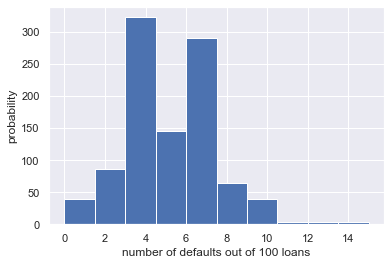

In [131]:
# A bank made 100 mortgage loans
# We want to know probability of number of defaults, given P(a default) = 0.05
# To investigate, we do a simlation, perform 100 Bernoulli trials and repeat it 1000 times
# Each experiment, we records how many defaults we get
# Success = True = default: Did the loan recipient default ? (True)

np.random.seed(42)
n_defaults = np.empty(1000)
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)
    
# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

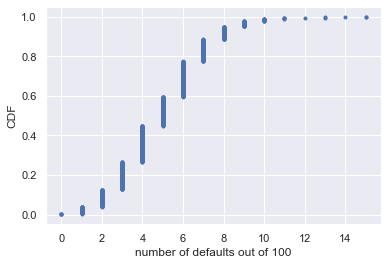

In [138]:
# Plot histogram of Bernoulli trials using ECDF

def ECDF_Version2(value):
    x = np.sort(value)
    y = np.arange(1, len(x) + 1) / len(x)
    _ = plt.plot(x, y, marker='.', linestyle='none')
    _ = plt.xlabel('number of defaults out of 100')
    _ = plt.ylabel('CDF')

    plt.show()

ECDF_Version2(n_defaults)

In [134]:
# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money

np.sum(n_defaults >= 10)
print('Probability of losing money:', np.sum(n_defaults >= 10)/len(n_defaults))

22

Probability of losing money: 0.022


In [ ]:
# Conclusion
"""we most likely get 5/100 defaults. 
    But we still have about a 2% chance of getting 10 or more defaults out of 100 loans."""

## Bernoulli trials with simulation, using built-in function

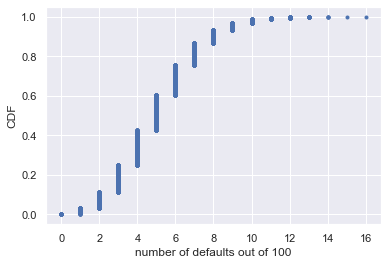

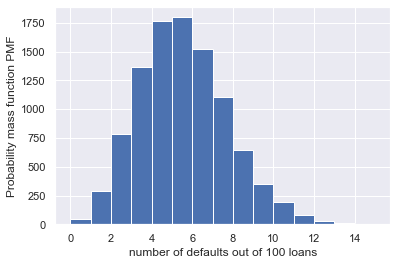

In [143]:
# Using built-in function is far more computationally efficient: np.random.binomial()
# Take 10,000 samples instead of 1000

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Plot ECDF
ECDF_Version2(n_defaults)

# Plot histogram
bins = np.arange(0, max(n_defaults))
_ = plt.hist(n_defaults, bins = bins)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('Probability mass function PMF')
plt.show()

## Poisson distribution

In his great book on information theory, statistical inference, and machine learning, David MacKay described a town called Poissonville where the buses have a very erratic schedule. If you stand at a bus stop in Poissonville, the amount of time you have to wait for a bus is completely independent of when the previous bus arrived. In other words, you would watch a bus drive off and another one will arrive almost instantly, or you could be waiting for hours. Arrival of buses in Poissonville is what we call a Poisson process.

=> The timing of the next event is completely independent of when the previous event happened.

Many real-life processes behave in this way. For example, natural births in a given hospital are a Poisson process. There is a well-defined average number of natural births per year, and the timing of one birth is independent of the timing of the previous one. Another example is hits on a website. The timing of the next hit is independent of the timing of the last.

The Poisson distribution has one parameter, the average number of arrivals in a given length of time. So, to match the story, we could consider the number of hits on a website in an hour with an average of six hits per hour. This is Poisson distributed. Let's take a look at the PMF for this example. For a given hour, we are most likely to get 6 hits, which is the average, but we may get more than ten, or possibly none

In [153]:
# Over 10 days, the experiment shows that the number of received emails on average = 6 emails per day
# lambda = 6, size = 10
# After we run poisson, we will see that day 1 is 5 emails, day 2 is 4 emails, and so on. 

np.random.seed(42)

samples_poisson = np.random.poisson(5, size=10)

print(samples_poisson)
print('Poisson with mean of emails is', np.mean(samples_poisson),
       'and std is', np.std(samples_poisson))

[5 4 4 5 5 3 5 4 6 7]
Poisson with mean of emails is 4.8 and std is 1.0770329614269007


## Relationship between Poisson distribution and Binomial distribution

- Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

In [154]:
# Poisson distribution
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson with mean is', np.mean(samples_poisson),
        'and std is', np.std(samples_poisson))

Poisson with mean is 10.0255 and std is 3.1464980136653513


In [155]:
# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


n = 20 Binom: 9.9635 2.2158447034934556
n = 100 Binom: 9.9928 3.012830589329576
n = 1000 Binom: 9.9994 3.1392992275347056


In [ ]:
# Conclusion
"""
The means are all about the same. 
The standard deviation of the Binomial distribution gets closer and closer
to that of the Poisson distribution as the probability p gets lower and lower.

So, we say that: Poisson distribution is a limit of the Binomial distribution for low probability of success and large number of trials
"""

## Probability density function (PDF)

Is a function of continuous variable

A special case of probability density function is Normal distribution: describes a continuous variable whose PDF has a single symmetric peak

Normal distribution is parametrized by 2 parameters: Mean (show where the center of the peak is) and Standard deviation (shows how wide the peak is or how spread out the data are)

Parameters of Normal distribution IS DIFFERENT FROM statistics we computed directly from data

Compare our data to a Normal PDF: Comparing using histogram suffers from binning bias. So it is better to compare ECDF of the data to theoretical CDF of the Normal distribution

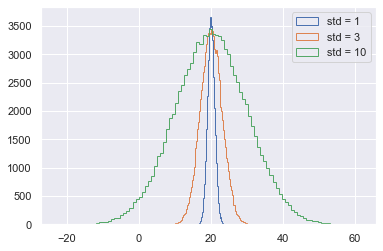

In [170]:
#Create Normal PDF with different STD

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, histtype='step')
_ = plt.hist(samples_std3, bins=100, histtype='step')
_ = plt.hist(samples_std10, bins=100, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
#plt.ylim(-0.01, 0.42)
plt.show()

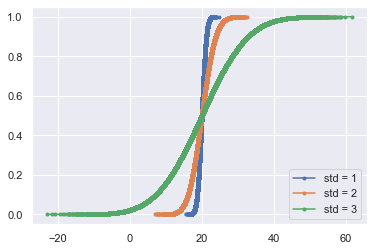

In [175]:
# Generate CDF of normal distribution with different STD

x_std1, y_std1 = ECDF(samples_std1)
x_std3, y_std3 = ECDF(samples_std3)
x_std10, y_std10 = ECDF(samples_std10)

_ = plt.plot(x_std1, y_std1, marker = '.')
_ = plt.plot(x_std3, y_std3, marker = '.')
_ = plt.plot(x_std10, y_std10, marker = '.')

_ = plt.legend(('std = 1', 'std = 2', 'std = 3'), loc = 'lower right')
plt.show()


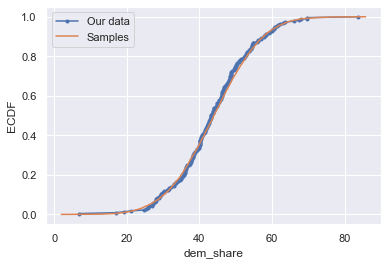

In [188]:
# Compare our data with normal distribution.
"""Idea: 
    - Plot ECDF of our data. 
    - Create ECDF of normal distribution using mu and sigma from our data with thousands of samples
    - If 2 ECDFs overlay, we can say that our data is normally distributed.
"""

# STEP 1: Use our data, compute mean and standard deviation.

mu = np.mean(df_swing['dem_share'])
sigma = np.std(df_swing['dem_share'])

# STEP 2: Sample out of a normal distribution with this mu and sigma
samples = np.random.normal(mu,sigma, size = 10000)


# Get CDF of the samples and of our data
x_data, y_data = ECDF(df_swing['dem_share'])
x_samples, y_samples = ECDF(samples)

# Plot CDF

_ = plt.plot(x_data, y_data, marker = '.')
_ = plt.plot(x_samples, y_samples)
_ = plt.xlabel('dem_share')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Our data', 'Samples'))

plt.show()